<h1>Star Wars Survey</h1>

<h4>Small plots with data from the Star Wars Survey:
- Which are the most seen movies?
- Which are the best ranked movies?
- Who is the favorite character?
</h4>
Data from [Github](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey)

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

print(star_wars.head(10))

   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0           NaN                                           Response             
1  3.292880e+09                                                Yes             
2  3.292880e+09                                                 No             
3  3.292765e+09                                                Yes             
4  3.292763e+09                                                Yes             
5  3.292731e+09                                                Yes             
6  3.292719e+09                                                Yes             
7  3.292685e+09                                                Yes             
8  3.292664e+09                                                Yes             
9  3.292654e+09                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                           

In [2]:
print(star_wars.columns)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [3]:
# Count NaN values in RespondendID
res_null = star_wars["RespondentID"].isnull().sum()
print("Count RespondentID == null: ", res_null)

# Remove rows without RespondendID
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]

Count RespondentID == null:  1


<h4>Most seen movies</h4>

In [4]:
# Change Yes to True and No to False for columns "Have you seen..." and "Do you consider..."
yes_no = {"Yes": True, "No": False}

for col in [
    "Have you seen any of the 6 films in the Star Wars franchise?",
    "Do you consider yourself to be a fan of the Star Wars film franchise?"
    ]:
    star_wars[col] = star_wars[col].map(yes_no)

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [5]:
# Change values in columns [3:9], True if seen, False if not seen

movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.nan: False,
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)

In [6]:
# Rename columns [3:9]
star_wars = star_wars.rename(columns={
        "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6"
        })

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


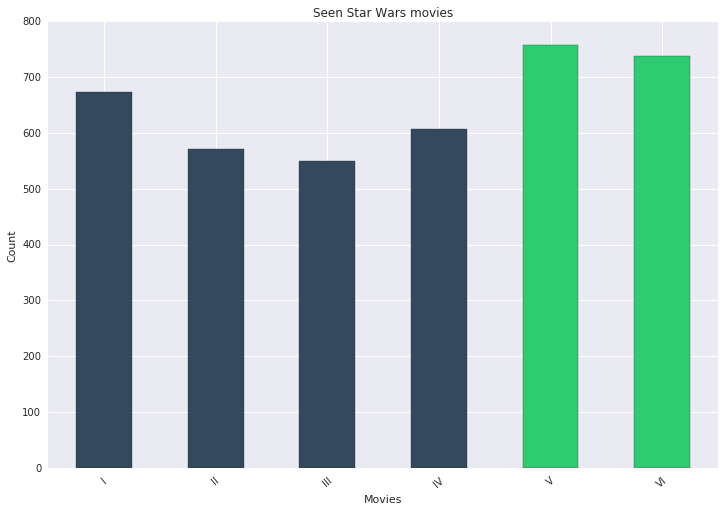

In [52]:
# Sum how many people have seen the different movies
most_seen_count = star_wars[star_wars.columns[3:9]].sum()

# Most seen movies are plotted green
colors = ["#2ecc71" if (x > 700) else "#34495e" for x in most_seen_count]

# Plot figure
plt.figure(figsize=(12, 8))
ax = most_seen_count.plot(kind="bar", color=colors)
xlabels = ["I", "II", "III", "IV", "V", "VI"]
plt.title("Seen Star Wars movies")
plt.xlabel("Movies")
plt.ylabel("Count")
plt.ylim((0,800))
ax.set_xticklabels(xlabels, rotation=40)

In [8]:
# Seperate star_wars: male | female
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

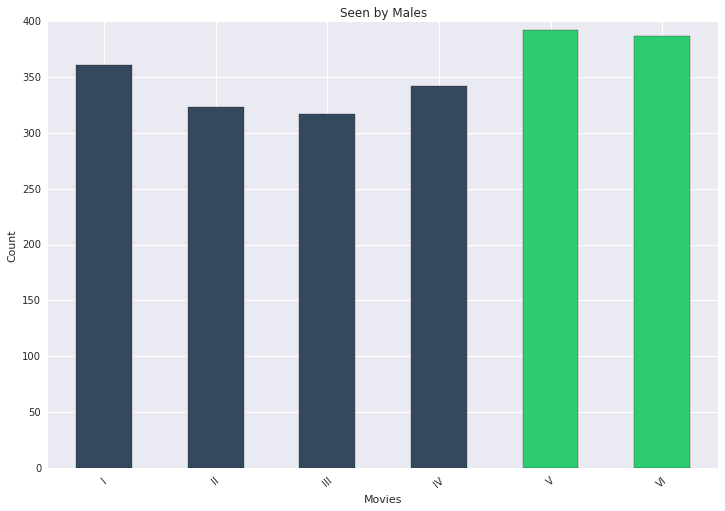

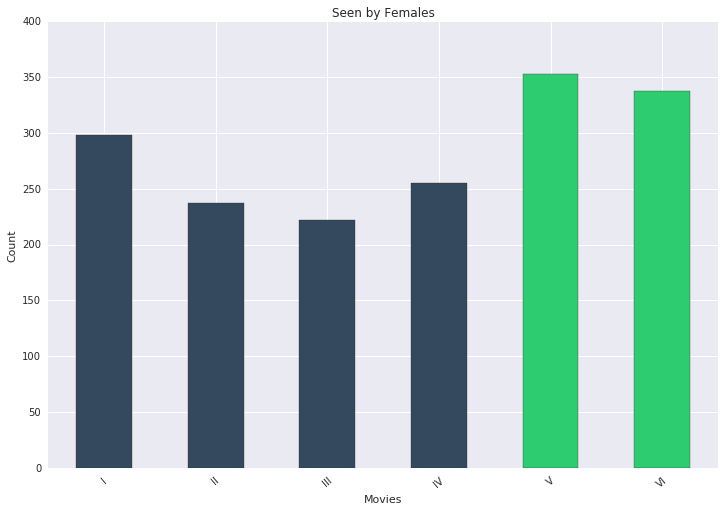

In [54]:
# Sum how many people have seen the different movies by gender
male_count_seen = males[males.columns[3:9]].sum()
female_count_seen = females[females.columns[3:9]].sum()

# Most seen movies are plotted green
m_colors = ["#2ecc71" if (x > 370) else "#34495e" for x in most_seen_count]
f_colors = ["#2ecc71" if (x > 320) else "#34495e" for x in most_seen_count]

# Plot for male
plt.figure(figsize=(12, 8))
ax = male_count_seen.plot(kind="bar", color=colors)
xlabels = ["I", "II", "III", "IV", "V", "VI"]
plt.title("Seen by Males")
plt.xlabel("Movies")
plt.ylabel("Count")
plt.ylim((0,400))
ax.set_xticklabels(xlabels, rotation=40)

# Plot for female
plt.figure(figsize=(12, 8))
ax = female_count_seen.plot(kind="bar", color=colors)
xlabels = ["I", "II", "III", "IV", "V", "VI"]
plt.title("Seen by Females")
plt.xlabel("Movies")
plt.ylabel("Count")
plt.ylim((0,400))
ax.set_xticklabels(xlabels, rotation=40)

<h4>Best ranked movies</h4>

In [10]:
# Rename columns [9:15]
star_wars = star_wars.rename(columns={
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6"
        })

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [11]:
# Convert to float
ranking = star_wars.columns[9:15]
star_wars[ranking] = star_wars[ranking].astype(float)

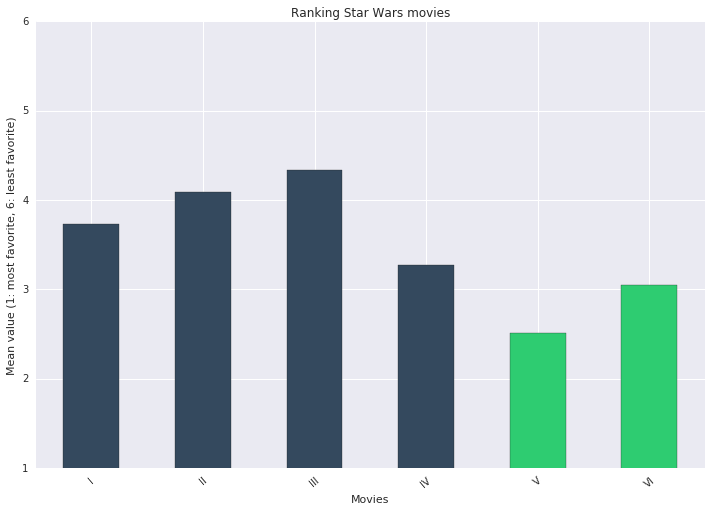

In [50]:
# Get the mean ranking
mean_ranking = star_wars[ranking].mean()

# Best two movies are plotted green
colors = ["#2ecc71" if (x < 3.2) else "#34495e" for x in mean_ranking]

# Plot figure
plt.figure(figsize=(12, 8))
ax = mean_ranking.plot(kind="bar", color=colors)
xlabels = ["I", "II", "III", "IV", "V", "VI"]
plt.title("Ranking Star Wars movies")
plt.xlabel("Movies")
plt.ylabel("Mean value (1: most favorite, 6: least favorite)")
plt.ylim((1,6))
ax.set_xticklabels(xlabels, rotation=40)

In [13]:
# Seperate star_wars: male | female
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

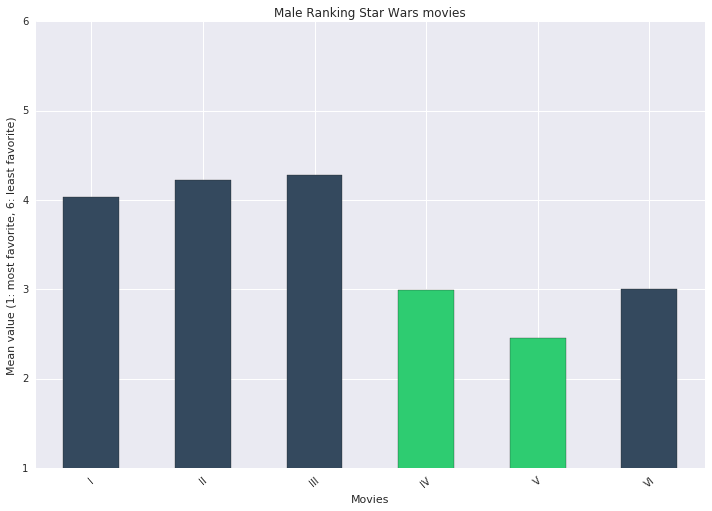

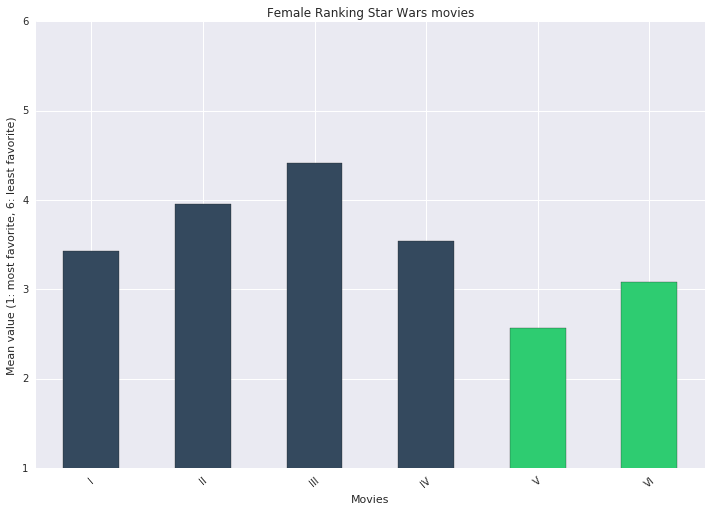

In [49]:
# Get the mean ranking by gender
male_mean_ranking = males[males.columns[9:15]].mean()
female_mean_ranking = females[females.columns[9:15]].mean()

# Best two movies are plotted green
m_colors = ["#2ecc71" if (x < 3.0) else "#34495e" for x in male_mean_ranking]
f_colors = ["#2ecc71" if (x < 3.1) else "#34495e" for x in female_mean_ranking]

# Plot for male
plt.figure(figsize=(12, 8))
ax = male_mean_ranking.plot(kind="bar", color=m_colors)
xlabels = ["I", "II", "III", "IV", "V", "VI"]
plt.title("Male Ranking Star Wars movies")
plt.xlabel("Movies")
plt.ylabel("Mean value (1: most favorite, 6: least favorite)")
plt.ylim((1,6))
ax.set_xticklabels(xlabels, rotation=40)

# Plot for female
plt.figure(figsize=(12, 8))
ax = female_mean_ranking.plot(kind="bar", color=f_colors)
xlabels = ["I", "II", "III", "IV", "V", "VI"]
plt.title("Female Ranking Star Wars movies")
plt.xlabel("Movies")
plt.ylabel("Mean value (1: most favorite, 6: least favorite)")
plt.ylim((1,6))
ax.set_xticklabels(xlabels, rotation=40)

<h4>Character Ranking</h4>

In [15]:
# Translate ranking to integers
char_ranking = {
    "Very favorably": 5,
    "Somewhat favorably": 4,
    "Neither favorably nor unfavorably (neutral)": 3,
    "Somewhat unfavorably": 2,
    "Very unfavorably": 1,
    "Unfamiliar (N/A)": np.NaN,
}

# Replace ranking with integers
star_wars[star_wars.columns[15:29]] = star_wars[star_wars.columns[15:29]].replace(char_ranking)

# Rename characher columns
star_wars = star_wars.rename(
    columns={
        "Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.": "han_solo",
        "Unnamed: 16": "luke_skywalker",
        "Unnamed: 17": "princess_leia_organa",
        "Unnamed: 18": "anakin_skywalker",
        "Unnamed: 19": "obi_wan_kenobi",
        "Unnamed: 20": "emperor_palpatine",
        "Unnamed: 21": "darth_vader",
        "Unnamed: 22": "lando_calrissian",
        "Unnamed: 23": "boba_fett",
        "Unnamed: 24": "C-3P0",
        "Unnamed: 25": "R2_D2",
        "Unnamed: 26": "jar_jar_binks",
        "Unnamed: 27": "padme_amidala",
        "Unnamed: 28": "yoda",
    }
)

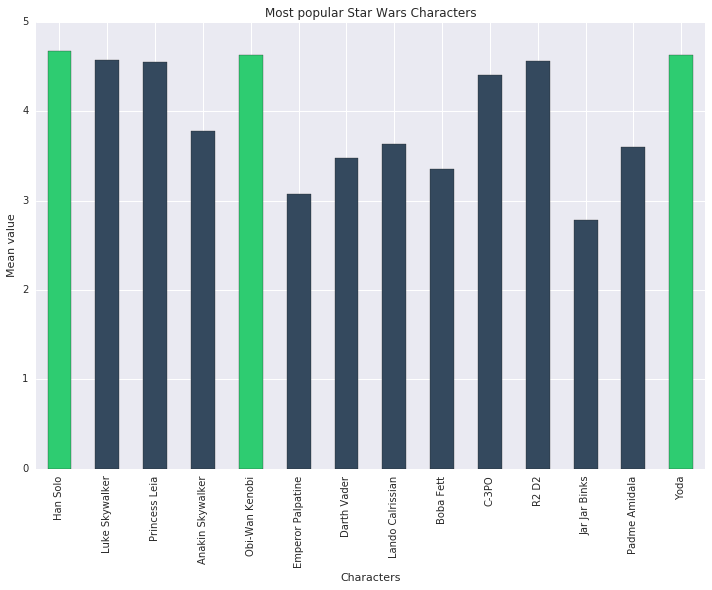

In [66]:
# Mean scores of each character
mean_char = star_wars[star_wars.columns[15:29]].mean()
mean_char_val = star_wars[star_wars.columns[15:29]].mean().values

# xlabels for plot
char_labels = ["Han Solo", "Luke Skywalker", "Princess Leia", "Anakin Skywalker",
    "Obi-Wan Kenobi", "Emperor Palpatine", "Darth Vader", "Lando Calrissian",
    "Boba Fett", "C-3PO", "R2 D2", "Jar Jar Binks", "Padme Amidala", "Yoda"]

# Most popular characters are plotted green
colors = ["#2ecc71" if (x > 4.6) else "#34495e" for x in mean_char_val]

# Plot figure
plt.figure(figsize=(12, 8))
ax = mean_char.plot(kind="bar", color=colors)
plt.title("Most popular Star Wars Characters")
plt.xlabel("Characters")
plt.ylabel("Mean value")
ax.set_xticklabels(char_labels, rotation=90)

In [55]:
# Seperate star_wars: male | female
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

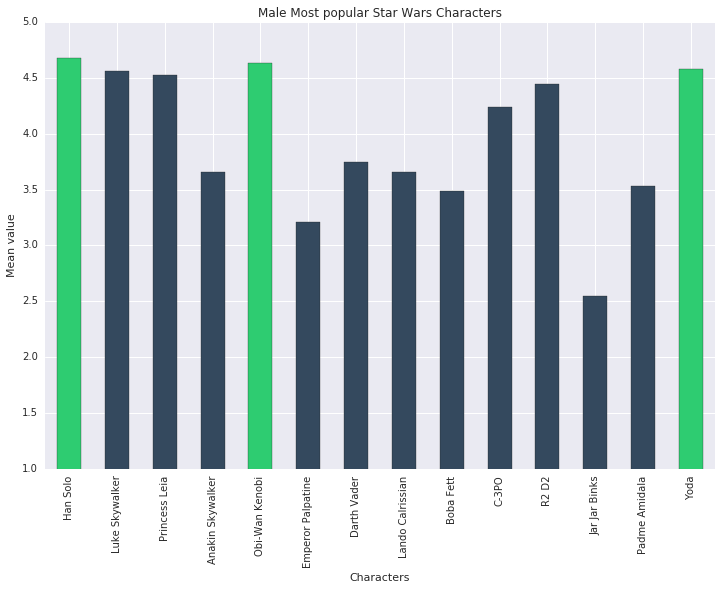

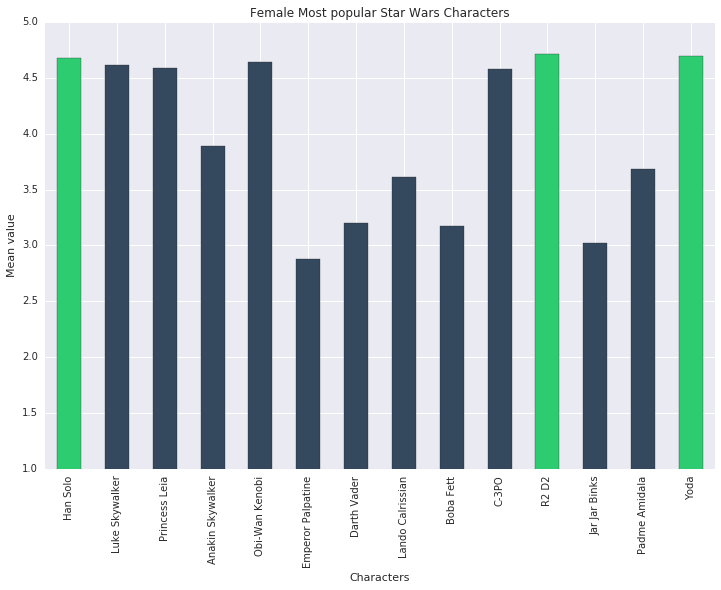

In [68]:
# Mean scores of each character by gender
male_char = males[males.columns[15:29]].mean()
female_char = females[females.columns[15:29]].mean()

# x labels for plot
char_labels = ["Han Solo", "Luke Skywalker", "Princess Leia", "Anakin Skywalker",
    "Obi-Wan Kenobi", "Emperor Palpatine", "Darth Vader", "Lando Calrissian",
    "Boba Fett", "C-3PO", "R2 D2", "Jar Jar Binks", "Padme Amidala", "Yoda"]

# Most popular characters are plotted green
m_colors = ["#2ecc71" if (x > 4.57) else "#34495e" for x in male_char]
f_colors = ["#2ecc71" if (x > 4.67) else "#34495e" for x in female_char]

# Plot for male
plt.figure(figsize=(12, 8))
ax = male_char.plot(kind="bar", color=m_colors)
xlabels = ["I", "II", "III", "IV", "V", "VI"]
plt.title("Male Most popular Star Wars Characters")
plt.xlabel("Characters")
plt.ylabel("Mean value")
plt.ylim((1,5))
ax.set_xticklabels(char_labels, rotation=90)

# Plot for female
plt.figure(figsize=(12, 8))
ax = female_char.plot(kind="bar", color=f_colors)
xlabels = ["I", "II", "III", "IV", "V", "VI"]
plt.title("Female Most popular Star Wars Characters")
plt.xlabel("Characters")
plt.ylabel("Mean value")
plt.ylim((1,5))
ax.set_xticklabels(char_labels, rotation=90)